In [1]:
import numpy as np

# Load the arrays
results_matrix = np.load('results_matrix.npy')
success_rate_matrix = np.load('success_rate_matrix.npy')
total_results_matrix = np.load('total_results_matrix.npy')

# Inspect their shapes and contents
print("Results Matrix Shape:", results_matrix.shape)
print("Results Matrix:\n", results_matrix)

print("Success Rate Matrix Shape:", success_rate_matrix.shape)
print("Success Rate Matrix:\n", success_rate_matrix)

print("Total Results Matrix Shape:", total_results_matrix.shape)
print("Total Results Matrix:\n", total_results_matrix)

Results Matrix Shape: (1, 5, 4, 5)
Results Matrix:
 [[[[ 8.54496094  7.89726547  7.50138235 10.29475975 16.99721146]
   [ 8.54062758  9.83774178  8.30623055 11.81721687 32.7414856 ]
   [ 9.15556632  9.24124915  9.48204803 13.77162457 13.47114372]
   [ 7.96753094  9.52060983  9.05320168 11.87882328 11.78893471]]

  [[ 8.72719388  9.82431143  9.23145771 10.62214375 77.18470764]
   [ 8.27380532  8.53519628  8.35959625 22.49763107 23.63195801]
   [ 7.12035326  7.06438243  6.61688089 12.12618446 11.72541046]
   [ 7.42428008  6.81799654  6.35035419  9.81760979 11.58942127]]

  [[ 9.62865225 10.99525501  9.86608315 11.26447487 38.27326202]
   [ 9.43132678  9.4237493   8.17893028 16.91974449 20.58345222]
   [ 8.99867238  8.2902423   9.28193855 16.99018669 17.8405056 ]
   [ 9.58039765  7.71714092  8.09266758 17.34835815 30.39782143]]

  [[10.09482323 10.98414949  9.93556023 12.08494377 19.61770439]
   [ 9.40682771  9.50821835  8.77716637 30.61949158 17.21764946]
   [ 9.06627032  8.41149684  8.4

In [4]:
def calculate_success_rate(results: np.ndarray) -> np.ndarray:
    """
    Calculate the success rate for each model under different hyperparameter settings.
    
    Parameters:
        results (np.ndarray): A 5-dimensional numpy array of shape (1, 5, 4, 5, 20)
                              containing loss values. The dimensions correspond to:
                              - 1: Wrapper dimension (to be removed)
                              - 5: First hyperparameter setting with 5 choices
                              - 4: Second hyperparameter setting with 4 choices
                              - 5: 5 different models
                              - 20: 20 experimental trials per setting
                              
    Returns:
        np.ndarray: A 3-dimensional array of shape (5, 4, 5) where each entry represents
                    the fraction (success rate) of trials in which the corresponding model was
                    the unique best (i.e. had the smallest loss) for that hyperparameter setting.
    
    Notes:
        - A model is counted as a success in a given trial only if its loss is strictly lower
          than the losses of every other model (i.e. it is a unique minimum for that trial).
        - If more than one model ties for the minimum loss in a trial, then no model is considered
          successful in that trial.
    """
    # Remove the wrapper dimension if it is of size 1:
    if results.shape[0] == 1:
        results = results[0]  # Now results shape becomes (5, 4, 5, 20)
    
    # Compute the minimum loss across models for each hyperparameter setting and trial.
    # This is done along the models axis (axis=2).
    min_vals = np.min(results, axis=2)  # Shape: (5, 4, 20)
    
    # Expand dims for correct broadcasting: add a new axis in the models dimension.
    min_vals_expanded = min_vals[:, :, None, :]  # Shape becomes (5, 4, 1, 20)
    
    # Create a mask for models that achieve the minimum loss by comparing each model's loss.
    is_min = (results == min_vals_expanded)  # Shape: (5, 4, 5, 20)
    
    # Count the number of models that achieved the minimum loss for each hyperparameter setting and trial.
    min_counts = np.sum(is_min, axis=2)  # Shape: (5, 4, 20)
    
    # Determine trials with a unique minimum (only one model gets the minimum)
    unique_trial = (min_counts == 1)  # Shape: (5, 4, 20)
    
    # Create a success mask that is True for entries where the model is the unique winner.
    # We use broadcasting to compare across the model axis.
    success_mask = is_min & unique_trial[:, :, None, :]  # Shape: (5, 4, 5, 20)
    
    # Count the number of successes over the trials axis.
    success_counts = np.sum(success_mask, axis=-1)  # Shape: (5, 4, 5)
    
    # Calculate success rates by dividing the success count by the number of trials (20).
    success_rates = success_counts / results.shape[-1]  # Element-wise division.
    
    return success_rates

In [17]:
success = calculate_success_rate(total_results_matrix)
success

array([[[0.3 , 0.35, 0.3 , 0.05, 0.  ],
        [0.35, 0.35, 0.3 , 0.  , 0.  ],
        [0.45, 0.35, 0.15, 0.  , 0.05],
        [0.25, 0.2 , 0.3 , 0.15, 0.1 ]],

       [[0.6 , 0.15, 0.2 , 0.05, 0.  ],
        [0.35, 0.25, 0.4 , 0.  , 0.  ],
        [0.35, 0.  , 0.65, 0.  , 0.  ],
        [0.2 , 0.25, 0.4 , 0.15, 0.  ]],

       [[0.35, 0.  , 0.6 , 0.05, 0.  ],
        [0.3 , 0.  , 0.65, 0.05, 0.  ],
        [0.35, 0.35, 0.2 , 0.1 , 0.  ],
        [0.1 , 0.3 , 0.3 , 0.3 , 0.  ]],

       [[0.5 , 0.  , 0.5 , 0.  , 0.  ],
        [0.35, 0.15, 0.5 , 0.  , 0.  ],
        [0.35, 0.45, 0.2 , 0.  , 0.  ],
        [0.15, 0.4 , 0.35, 0.1 , 0.  ]],

       [[0.35, 0.15, 0.3 , 0.2 , 0.  ],
        [0.3 , 0.1 , 0.6 , 0.  , 0.  ],
        [0.05, 0.35, 0.6 , 0.  , 0.  ],
        [0.05, 0.25, 0.7 , 0.  , 0.  ]]])

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loss_boxplots(loss_data: np.ndarray, 
                       hyperparam1_labels=None, 
                       hyperparam2_labels=None, 
                       model_labels=None):
    """
    Create a grid of boxplots that shows the loss distributions for each model 
    under every combination of hyperparameter settings.
    
    Parameters:
      - loss_data: NumPy array of shape (1, 5, 4, 5, 20) or (5, 4, 5, 20).
                   Each entry is the loss for a model in a given trial.
      - hyperparam1_labels: List of labels for hyperparameter 1 (default: 'H1-0', 'H1-1', ...).
      - hyperparam2_labels: List of labels for hyperparameter 2 (default: 'H2-0', 'H2-1', ...).
      - model_labels: List of labels for models (default: 'Model 1', 'Model 2', ...).
    
    The function creates a figure with 5 rows (for the 5 choices of hyperparameter 1) 
    and 4 columns (for the 4 choices of hyperparameter 2). For each subplot, a boxplot 
    of the 20 loss values (for each model) is generated.
    """
    # Remove the wrapper dimension if present
    if loss_data.shape[0] == 1:
        loss_data = loss_data[0]  # Now shape should be (5, 4, 5, 20)
    
    h1, h2, num_models, num_trials = loss_data.shape  # (5, 4, 5, 20)
    
    # Set default labels if not given.
    if hyperparam1_labels is None:
        hyperparam1_labels = [f'H1-{i}' for i in range(h1)]
    if hyperparam2_labels is None:
        hyperparam2_labels = [f'H2-{i}' for i in range(h2)]
    if model_labels is None:
        model_labels = [f'Model {i+1}' for i in range(num_models)]
    
    fig, axes = plt.subplots(nrows=h1, ncols=h2, figsize=(16, 12), sharey=False)
    for i in range(h1):
        for j in range(h2):
            ax = axes[i, j]
            boxplot_data = [loss_data[i, j, m, :] for m in range(num_models)]
            bp = ax.boxplot(boxplot_data, patch_artist=True, showfliers=True)
            ax.set_yscale('log')  # set log scale
            ax.set_title(f"{hyperparam1_labels[i]}, {hyperparam2_labels[j]}", fontsize=10)
            ax.set_xticks(range(1, num_models + 1))
            ax.set_xticklabels(model_labels, rotation=45, fontsize=8)
            if j == 0:
                ax.set_ylabel("Loss", fontsize=10)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


def plot_success_rate_heatmaps(success_rate_data: np.ndarray, 
                               hyperparam1_labels=None, 
                               hyperparam2_labels=None, 
                               model_labels=None):
    """
    Create a heatmap for each model showing success rate across the hyperparameter grid.
    
    Parameters:
      - success_rate_data: NumPy array of shape (5, 4, 5) where the dimensions are:
            hyperparameter 1, hyperparameter 2, model.
      - hyperparam1_labels: List of labels for hyperparameter 1 (default: 'H1-0', 'H1-1', ...).
      - hyperparam2_labels: List of labels for hyperparameter 2 (default: 'H2-0', 'H2-1', ...).
      - model_labels: List of labels for models (default: 'Model 1', ...).
    
    This function creates one heatmap per model (arranged in a row) where the x-axis 
    represents hyperparameter 2 choices and the y-axis represents hyperparameter 1 choices.
    """
    h1, h2, num_models = success_rate_data.shape  # (5, 4, 5)
    
    # Set default labels if none provided.
    if hyperparam1_labels is None:
        hyperparam1_labels = [f'H1-{i}' for i in range(h1)]
    if hyperparam2_labels is None:
        hyperparam2_labels = [f'H2-{i}' for i in range(h2)]
    if model_labels is None:
        model_labels = [f'Model {i+1}' for i in range(num_models)]
    
    # Create subplots with one row per model.
    fig, axes = plt.subplots(nrows=1, ncols=num_models, figsize=(4*num_models, 5))
    if num_models == 1:
        axes = [axes]  # Ensure axes is iterable.
    
    for m in range(num_models):
        ax = axes[m]
        # Extract the hyperparameter grid for model m: shape (5,4)
        data = success_rate_data[:, :, m]
        cax = ax.imshow(data, aspect='auto', origin='upper', interpolation='nearest')
        ax.set_title(model_labels[m])
        ax.set_xlabel("Hyperparameter 2")
        ax.set_ylabel("Hyperparameter 1")
        ax.set_xticks(np.arange(len(hyperparam2_labels)))
        ax.set_xticklabels(hyperparam2_labels, rotation=45, fontsize=8)
        ax.set_yticks(np.arange(len(hyperparam1_labels)))
        ax.set_yticklabels(hyperparam1_labels, fontsize=8)
        fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
        
    fig.suptitle("Success Rate Heatmaps per Model", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


def plot_aggregate_success(success_rate_data: np.ndarray, model_labels=None):
    """
    Plot a bar chart of the aggregate (average over hyperparameter configurations) 
    success rate for each model.
    
    Parameters:
      - success_rate_data: NumPy array of shape (5, 4, 5) where the dimensions are:
            hyperparameter 1, hyperparameter 2, model.
      - model_labels: List of labels for models (default: 'Model 1', 'Model 2', etc.).
      
    For each model, the function averages the success rate across all hyperparameter
    settings and then creates a bar chart for overall comparison.
    """
    # Aggregate the success rate by taking the mean over the hyperparameter settings axes.
    # Success_rate_data shape is (5,4,5) so we average over axis 0 and 1.
    agg_success = np.mean(success_rate_data, axis=(0, 1))  # shape: (5,)
    
    num_models = agg_success.shape[0]
    if model_labels is None:
        model_labels = [f'Model {i+1}' for i in range(num_models)]
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(model_labels, agg_success)
    plt.xlabel("Model")
    plt.ylabel("Average Success Rate")
    plt.title("Aggregate Success Rate per Model")
    plt.ylim(0, 1)  # success rate is a fraction from 0 to 1
    # Optionally annotate the bars
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width() / 2, height), 
                     xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

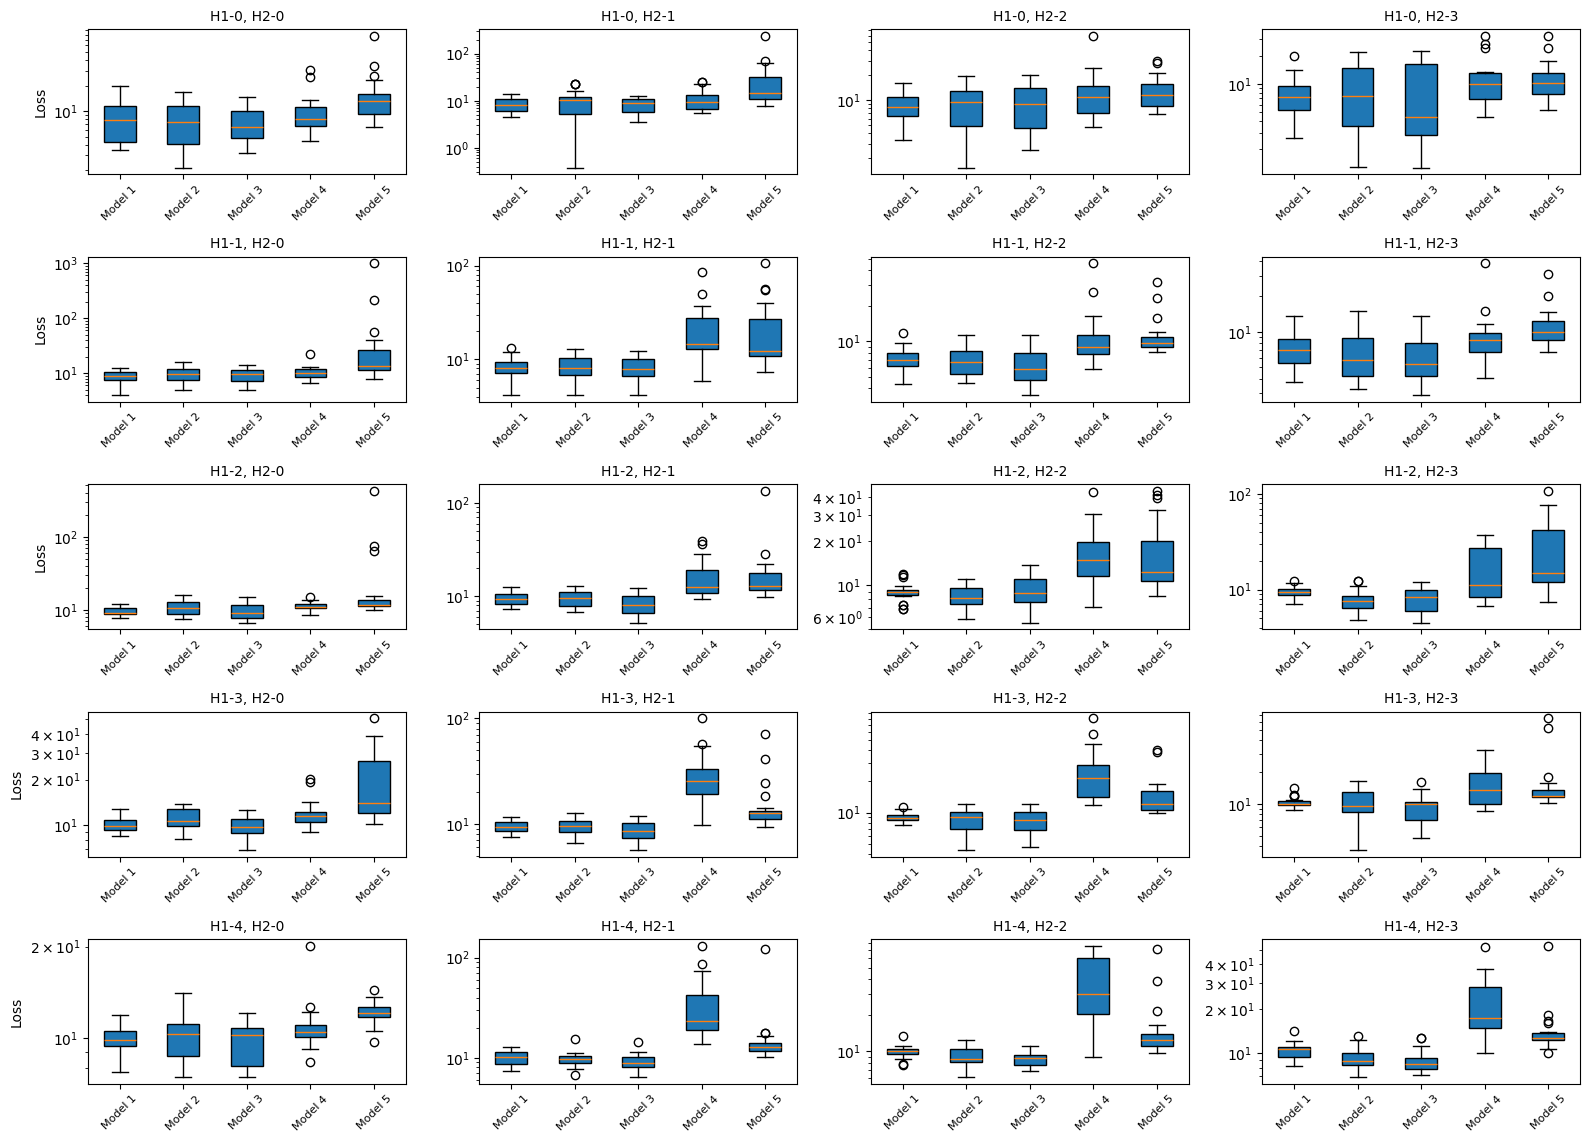

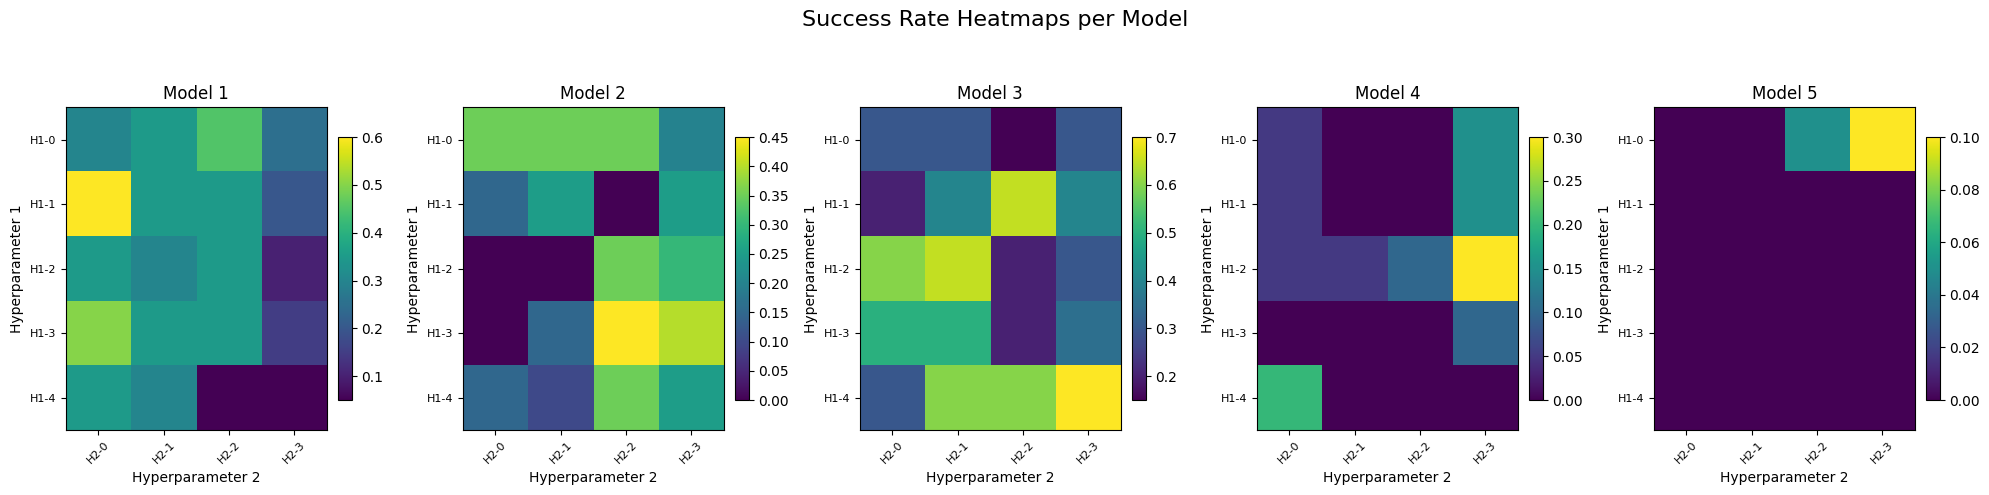

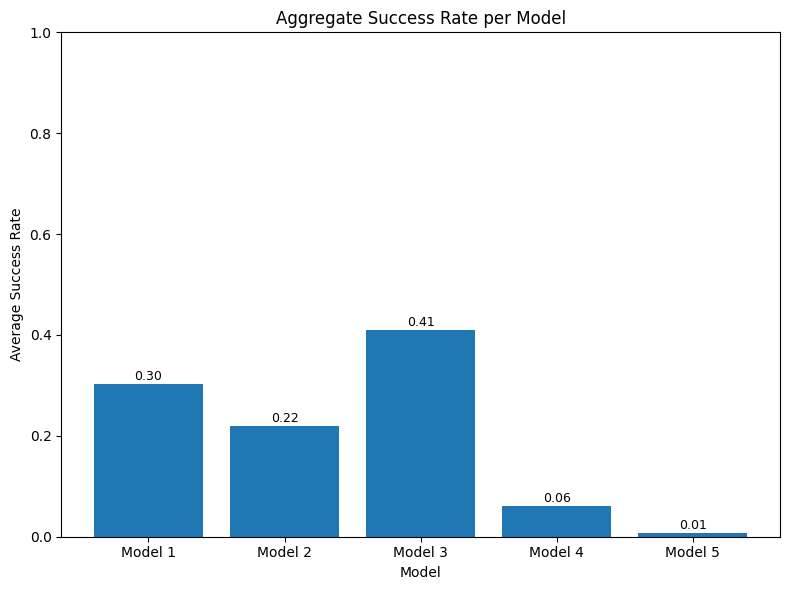

In [11]:
# Visualize loss distributions with boxplots
plot_loss_boxplots(total_results_matrix)

# Visualize success rate heatmaps for each model
plot_success_rate_heatmaps(success)

# Visualize aggregate average success rate as a bar chart
plot_aggregate_success(success)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_boxplots_by_hyper1(loss_data: np.ndarray,
                            hyperparam1_labels=None,
                            hyperparam2_labels=None,
                            model_labels=None,
                            log_scale=False):
    """
    Create a figure with 5 subplots (one for each value of hyperparameter 1).
    In each subplot the loss distributions are shown as grouped boxplots for the
    4 hyperparameter 2 configurations. Within each group, the 5 boxplots correspond
    to the 5 models.

    Parameters:
      - loss_data: NumPy array of shape (1, 5, 4, 5, 20) or (5, 4, 5, 20).
                   Each entry represents the loss for a particular trial.
      - hyperparam1_labels: List of labels for hyperparameter 1 (default: "H1-0", "H1-1", ...).
      - hyperparam2_labels: List of labels for hyperparameter 2 (default: "H2-0", "H2-1", ...).
      - model_labels: List of labels for models (default: "Model 1", "Model 2", ...).
      - log_scale: Boolean, if True the y-axis will be set to a logarithmic scale.
    """
    # Remove the wrapper dimension, if present.
    if loss_data.shape[0] == 1:
        loss_data = loss_data[0]  # Now shape should be (5, 4, 5, 20)
        
    # Unpack shape
    num_h1, num_h2, num_models, num_trials = loss_data.shape  # 5,4,5,20

    # Set default labels if needed.
    if hyperparam1_labels is None:
        hyperparam1_labels = [f'H1-{i}' for i in range(num_h1)]
    if hyperparam2_labels is None:
        hyperparam2_labels = [f'H2-{i}' for i in range(num_h2)]
    if model_labels is None:
        model_labels = [f'Model {i+1}' for i in range(num_models)]
    
    # Define a color for each model (consistent across all subplots)
    colors = ['lightblue', 'lightgreen', 'salmon', 'violet', 'wheat']  # One color per model

    # Create the figure with one subplot per hyperparameter 1 value.
    fig, axes = plt.subplots(nrows=num_h1, ncols=1, figsize=(12, 4 * num_h1), sharex=False)
    
    # In case there is only one subplot (num_h1==1), force axes to be iterable.
    if num_h1 == 1:
        axes = [axes]

    # Loop over hyperparameter 1 values, each gets its own subplot.
    for i in range(num_h1):
        ax = axes[i]
        data_all = []    # to collect the loss arrays for each group/model
        positions = []   # the x positions at which to put each boxplot
        group_centers = []  # to mark center of each hyperparam2 group for labeling
        
        gap = 1  # gap between groups (in x-axis units)
        # Loop over the 4 hyperparameter 2 values for this hyperparameter 1 configuration.
        for j in range(num_h2):
            base = j * (num_models + gap)  # starting position for this group
            # positions for each of the 5 models within this group.
            pos = list(range(base + 1, base + 1 + num_models))
            # For each model in this hyper 2 group, extract the 20 loss values.
            for m in range(num_models):
                data_all.append(loss_data[i, j, m, :])
                positions.append(pos[m])
            group_centers.append(np.mean(pos))
        
        # Create the boxplots for this subplot.
        bp = ax.boxplot(data_all, positions=positions, widths=0.6,
                        patch_artist=True, showfliers=True)
        
        # Color each box based on its model. Since for each group the boxes
        # appear in order (model 0 through model 4), we use modulo arithmetic.
        for idx, box in enumerate(bp['boxes']):
            model_idx = idx % num_models  # cycles from 0 to 4
            box.set(facecolor=colors[model_idx])
        
        # Set the x-axis ticks at the centers of each hyperparam2 group.
        ax.set_xticks(group_centers)
        ax.set_xticklabels(hyperparam2_labels, fontsize=10)
        ax.set_ylabel("Loss", fontsize=12)
        ax.set_title(f"Loss Distributions for {hyperparam1_labels[i]}", fontsize=14)
        if log_scale:
            ax.set_yscale("log")
    
    # Create a custom legend for the models (appears outside the subplots)
    from matplotlib.patches import Patch
    legend_handles = [Patch(facecolor=colors[i], edgecolor='k', label=model_labels[i])
                      for i in range(num_models)]
    # Place legend to the right of the plots.
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave space on the right for the legend
    plt.show()

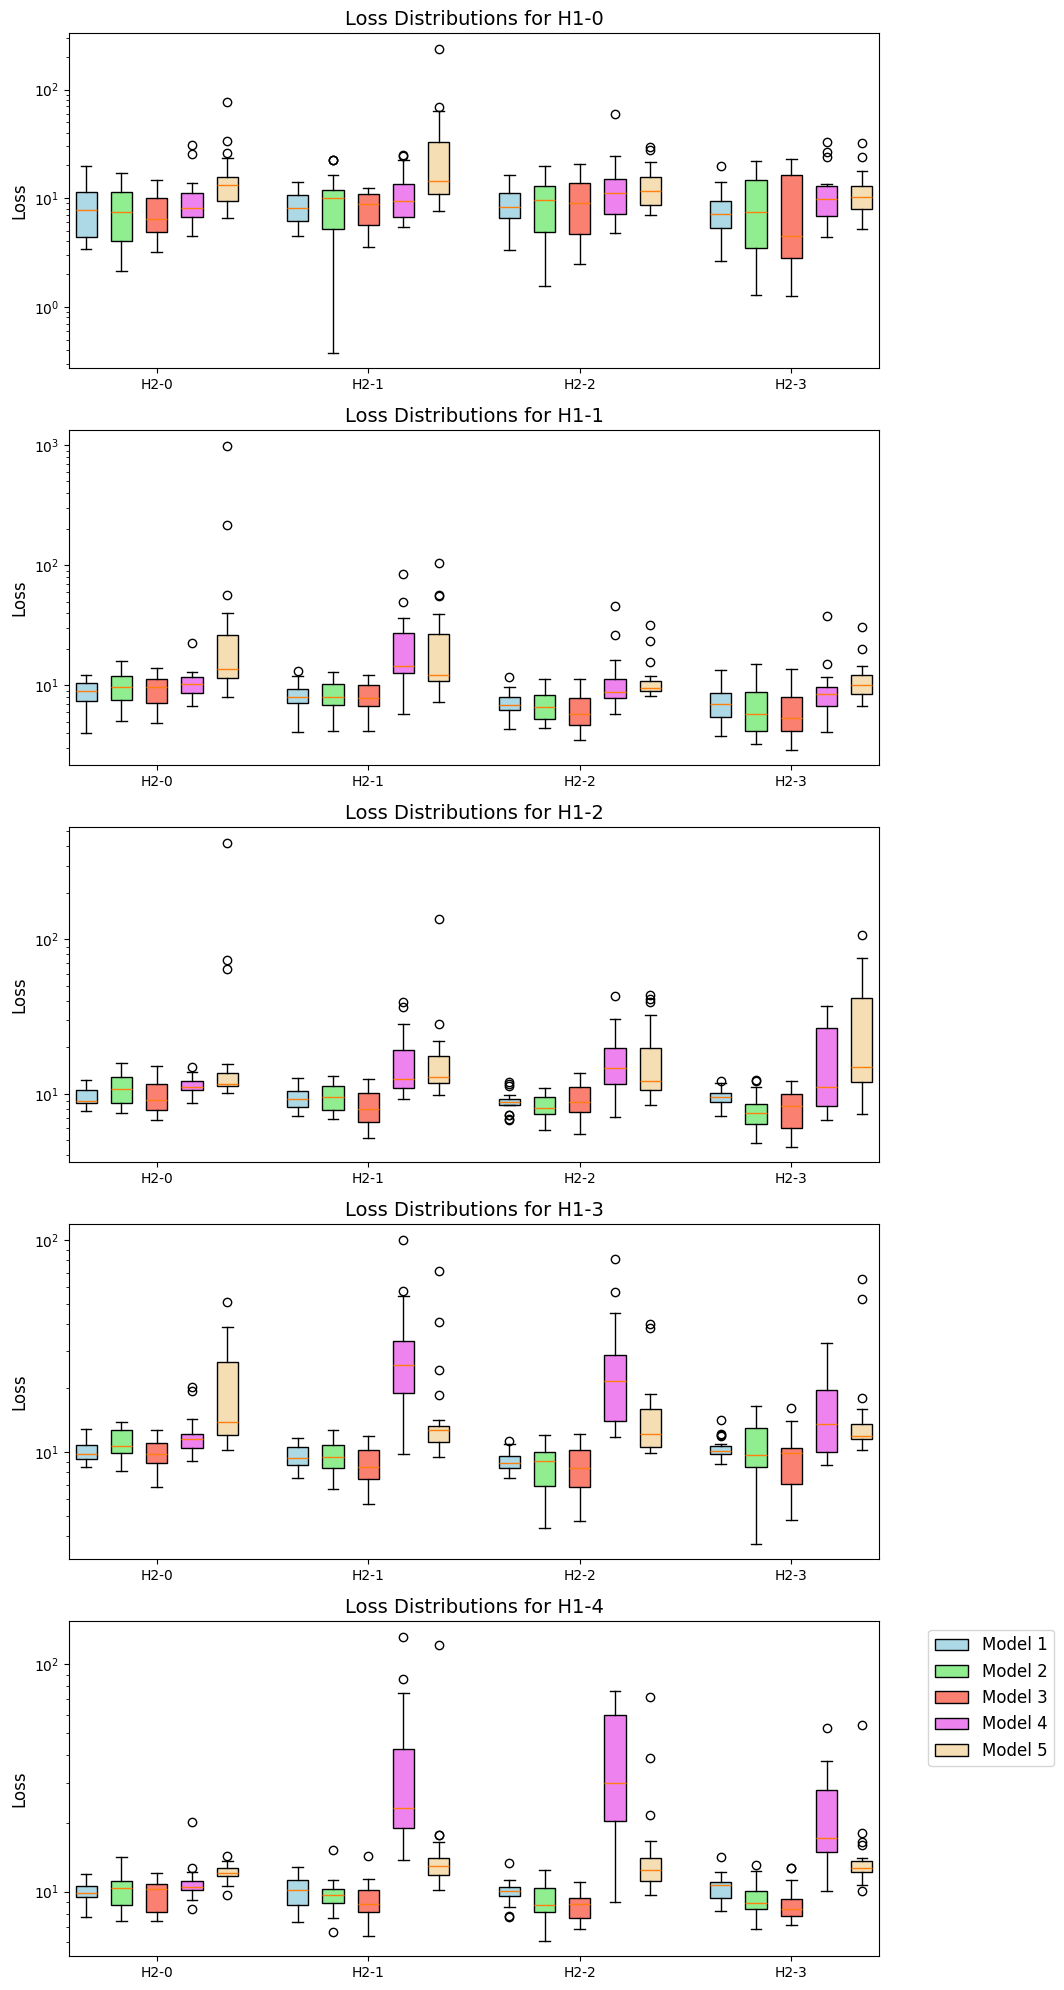

In [14]:
plot_boxplots_by_hyper1(total_results_matrix, log_scale=True)

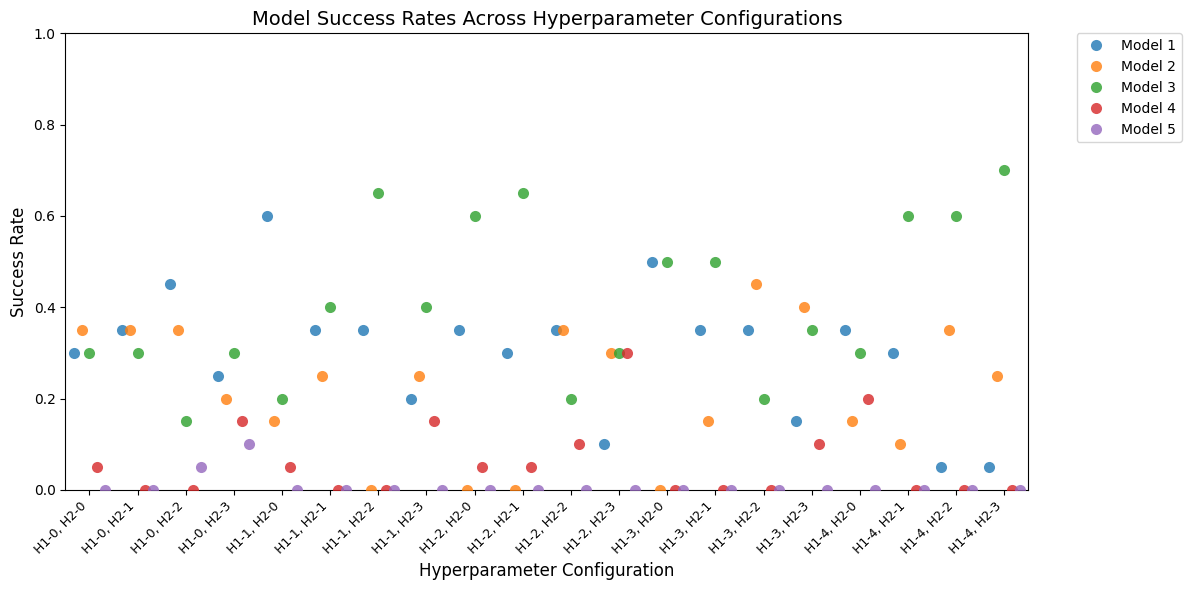

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_success_rates_strip(success_rate_data: np.ndarray,
                             hyperparam1_labels=None,
                             hyperparam2_labels=None,
                             model_labels=None):
    """
    Plot success rates for each model using a single strip plot. Instead of averaging or using subplots,
    this function creates a long-form DataFrame combining the hyperparameter settings into a single axis.
    Each configuration (combination of hyperparameter 1 and hyperparameter 2) is displayed on the x-axis,
    and for each configuration, the success rate of each model (as a colored marker) is plotted on the y-axis.
    
    Parameters:
      - success_rate_data: numpy.ndarray of shape (5, 4, 5) containing success rates.
      - hyperparam1_labels: List of labels for hyperparameter 1 (default: ['H1-0', 'H1-1', ...]).
      - hyperparam2_labels: List of labels for hyperparameter 2 (default: ['H2-0', 'H2-1', ...]).
      - model_labels: List of labels for models (default: ['Model 1', 'Model 2', ...]).
    """
    # Extract the dimensions: hyperparam1 (5), hyperparam2 (4), models (5)
    h1, h2, n_models = success_rate_data.shape
    
    # Default label definitions if none are provided:
    if hyperparam1_labels is None:
        hyperparam1_labels = [f'H1-{i}' for i in range(h1)]
    if hyperparam2_labels is None:
        hyperparam2_labels = [f'H2-{j}' for j in range(h2)]
    if model_labels is None:
        model_labels = [f'Model {m+1}' for m in range(n_models)]
    
    # Create a long-form list of records so that each record corresponds to one data point:
    data_records = []
    for i in range(h1):
        for j in range(h2):
            # Create a label for the configuration that combines the two hyperparameter settings
            config_label = f"{hyperparam1_labels[i]}, {hyperparam2_labels[j]}"
            # Also store a numeric index in case you want to order by configuration
            config_index = i * h2 + j  
            for m in range(n_models):
                record = {
                    'Configuration': config_label,
                    'ConfigIdx': config_index,
                    'Model': model_labels[m],
                    'SuccessRate': success_rate_data[i, j, m]
                }
                data_records.append(record)
    
    # Convert the list of dictionaries to a pandas DataFrame.
    df = pd.DataFrame(data_records)
    
    # It can be helpful to sort the DataFrame by ConfigIdx for a consistent ordering.
    df.sort_values('ConfigIdx', inplace=True)
    
    # Set up the figure.
    plt.figure(figsize=(12, 6))
    
    # Use a strip plot (or swarmplot) to show data points:
    # - x: the configuration label
    # - y: the success rate
    # - hue: the model identity
    sns.stripplot(x='Configuration', y='SuccessRate', hue='Model',
                  data=df, jitter=True, dodge=True, size=8, alpha=0.8)
    
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.ylabel("Success Rate", fontsize=12)
    plt.xlabel("Hyperparameter Configuration", fontsize=12)
    plt.ylim(0, 1)
    plt.title("Model Success Rates Across Hyperparameter Configurations", fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()

plot_success_rates_strip(success)

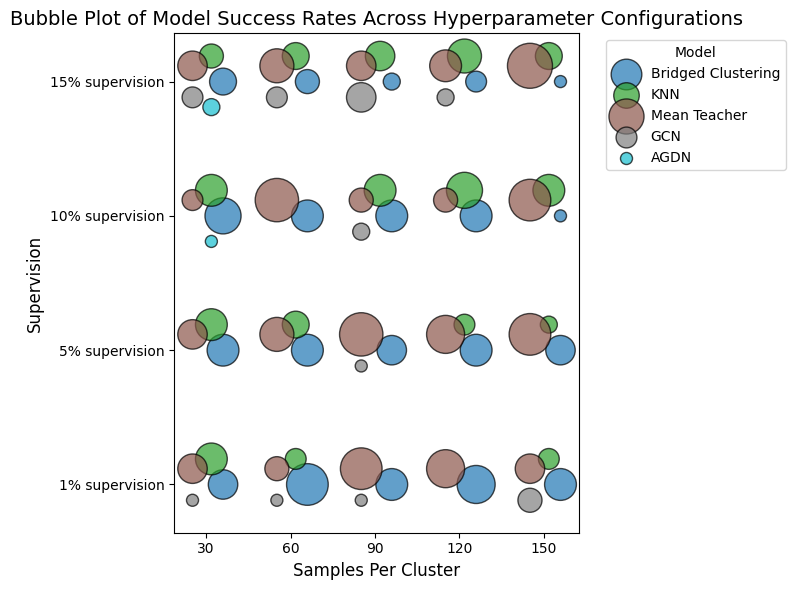

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot_success_rates_bubble(success_rate_data: np.ndarray,
                              hyperparam1_labels=["30", "60", "90", "120", "150"],
                              hyperparam2_labels=["1% supervision", "5% supervision", "10% supervision", "15% supervision"],
                              model_labels=["Bridged Clustering", "KNN", "Mean Teacher", "GCN", "AGDN", "Bridged AGDN"],
                              bubble_scale=1500,
                              offset_radius=0.2):
    """
    Plot success rates in a bubble plot that preserves both hyperparameter dimensions.
    
    Each point in the grid corresponds to one hyperparameter configuration with:
      - x-axis: Hyperparameter 1 (5 choices)
      - y-axis: Hyperparameter 2 (4 choices)
    
    Within each cell, five bubbles (one per model) are plotted with a small radial offset
    to avoid overlap. The bubble size is proportional to the success rate (a value in [0,1])
    for that model at that configuration. Different colors indicate different models.
    
    Parameters:
      - success_rate_data: A numpy array of shape (5, 4, 5) where:
                           * 5: choices for hyperparameter 1,
                           * 4: choices for hyperparameter 2,
                           * 5: models.
      - hyperparam1_labels: List of labels for hyperparameter 1 (default: ['H1-0', 'H1-1', ...])
      - hyperparam2_labels: List of labels for hyperparameter 2 (default: ['H2-0', 'H2-1', ...])
      - model_labels: List of labels for the models (default: ['Model 1', 'Model 2', ...])
      - bubble_scale: A scaling factor to adjust the bubble sizes (default: 1500)
      - offset_radius: The radius (in axis units) for offsetting bubbles within each cell (default: 0.2)
    """
    # Dimensions: hyperparam1 (h1) x hyperparam2 (h2) x models (n_models)
    h1, h2, n_models = success_rate_data.shape
    
    # Set default labels if not provided.
    if hyperparam1_labels is None:
        hyperparam1_labels = [f'H1-{i}' for i in range(h1)]
    if hyperparam2_labels is None:
        hyperparam2_labels = [f'H2-{j}' for j in range(h2)]
    if model_labels is None:
        model_labels = [f'Model {m+1}' for m in range(n_models)]
    
    # Create a single figure/axes.
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Use a colormap (here using the tab10 palette).
    colors = plt.cm.tab10(np.linspace(0, 1, n_models))
    
    # Loop over each model, and for each hyperparameter configuration,
    # compute an offset position within the cell.
    for m in range(n_models):
        xs, ys, sizes = [], [], []
        for i in range(h1):
            for j in range(h2):
                # Compute a small offset using polar coordinates. The angle is determined
                # by the model index so that the five models spread out in a roughly circular pattern.
                angle = 2 * np.pi * m / n_models
                x_offset = offset_radius * np.cos(angle)
                y_offset = offset_radius * np.sin(angle)
                
                # The base coordinate is the (i, j) cell. Add the offset.
                xs.append(i + x_offset)
                ys.append(j + y_offset)
                
                # Bubble size: scale the success rate (in [0, 1]) using bubble_scale.
                sizes.append(success_rate_data[i, j, m] * bubble_scale)
        
        # Plot the bubbles for this model.
        ax.scatter(xs, ys, s=sizes, color=colors[m],
                   alpha=0.7, label=model_labels[m], edgecolor='k')
    
    # Set the ticks to be at integer positions corresponding to the hyperparameter indices.
    ax.set_xticks(np.arange(h1))
    ax.set_xticklabels(hyperparam1_labels, fontsize=10)
    ax.set_yticks(np.arange(h2))
    ax.set_yticklabels(hyperparam2_labels, fontsize=10)
    
    ax.set_xlabel("Samples Per Cluster", fontsize=12)
    ax.set_ylabel("Supervision", fontsize=12)
    ax.set_title("Bubble Plot of Model Success Rates Across Hyperparameter Configurations", fontsize=14)
    
    # Add a legend. Placing it outside the main axes avoids overcrowding.
    ax.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
    
    plt.tight_layout()
    plt.show()

plot_success_rates_bubble(success, bubble_scale=1500, offset_radius=0.2)